In [29]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib widget

In [30]:
os.listdir('../GRAD')

['Ayush Jain Advisor Request - Fall 2021.doc',
 'CDA',
 'Graduate Change of Major.pdf',
 'Melt Viscosity',
 'Melt Viscosity Data.xlsx',
 'MSE 3140',
 'MSE 6411',
 'Papers',
 '~$Melt Viscosity Background.pptx',
 '~$Melt Viscosity Data.xlsx']

In [31]:
data = pd.read_excel('../GRAD/Melt Viscosity Data.xlsx')

In [32]:
id = 0
temp = data.loc[0, 'Temperature']
poly = data.loc[0, 'Polymer']
for i in data.index:
    if data.loc[i, 'Temperature'] == temp and data.loc[i, 'Polymer'] == poly:
        data.loc[i, 'SAMPLE_ID'] = id
    else:
        id += 1
        data.loc[i, 'SAMPLE_ID'] = id
    
    temp = data.loc[i, 'Temperature']
    poly = data.loc[i, 'Polymer']

In [33]:
z_shear_samples = []
sample_id = list(data.loc[data['Shear Rate'] == 0].agg({'SAMPLE_ID': 'unique'})[0])
zero_shear_data = data[data['SAMPLE_ID'].isin(z_shear_samples)]
for i in range(len(sample_id)): 
    if sum(data.loc[data['SAMPLE_ID'] == sample_id[i], 'Shear Rate'].to_list()) == 0:
        z_shear_samples.append(i)
        

In [35]:
PL_data = pd.DataFrame(columns = ['SAMPLE_ID', 'Polymer', 'SMILES', 'Temperature', 'Mcr', 'K1', 'K2', 'Alpha'])
x_overall = []
y_overall = []
T_overall = []
for i in z_shear_samples:
    x = data.loc[data['SAMPLE_ID'] == i, 'Mw'].to_list()
    
    if type(x[0]) != float or pd.isnull(x[0]): continue
    x_overall = x_overall + x
    y = data.loc[data['SAMPLE_ID'] == i, 'Melt Viscosity (poise)'].to_list()
    y_overall = y_overall + y
    T =  data.loc[data['SAMPLE_ID'] == i, 'Temperature'].to_list()
    T_overall = T_overall + T
    
    
    if len(x) < 5: continue
    
    
    
    ind = np.argsort(x)
    x = [x[i] for i in ind]
    y = [y[i] for i in ind]
    print(i)
    
    poly = data.loc[data['SAMPLE_ID'] == i, 'Polymer'].to_list()[0]
    temp = T[0]
    p = 2
    Rel_E = 0
    log_k_old = 0
    while Rel_E < 0.05:
        #print('p = ' + str(p))
        log_k1 = np.mean(np.log10(y[0:p]) - np.log10(x[0:p]))
        #print('logk1 = ' + str(log_k1))

        y_pred = np.power(10, np.log10(x[0:p]) + log_k1)

        RMSE = np.sqrt(max(np.power(y[0:p] - y_pred,p))/len(y_pred))
        Rel_E = RMSE
        print("Rel_E = " + str(Rel_E))
        p+=1
        log_k_old = log_k1

    p -= 2
    if p == 1: p = 0
    log_k1 = log_k_old
    #print("p final = " + str(p))

    x2 = x[p:]
    y2 = y[p:]
    
    if i > 36: print(x2, y2)
    fit = np.polyfit(np.log10(x2),np.log10(y2),1)
    if p > 0: Mcr = np.power(10, (log_k1 - fit[1])/ (fit[0] - 1))
    #print(fit)
    
    y1_pred = np.power(10, np.log10(x[0:p]) + log_k1)
    y2_pred = np.power(10, np.log10(x2)*fit[0] + fit[1])
    
#     ax = plt.gca()
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_title(i)
#     plt.scatter(x, y)
#     plt.title(str(i) + "_" + poly + "_" + str(temp) + 'C')
#     if p > 0: plt.scatter(Mcr, np.power(10, np.log10(Mcr) + log_k1), c = 'k')
#     if p > 0: plt.plot(x[0:p], y1_pred)
#     plt.plot(x2, y2_pred, 'r')
#     plt.show()
    PL_data = PL_data.append({'SAMPLE_ID' : i, 'Polymer': poly, 
                    'SMILES' : data.loc[data['SAMPLE_ID'] == i, 'SMILES'].to_list()[0], 
                    'Temperature' : temp, 
                    'Mcr': Mcr if p > 0 else np.NaN, 'K1': np.power(10, log_k1), 'K2' : np.power(10, fit[1]), 
                    'Alpha': fit[0]}, ignore_index = True)
    
# ax = plt.gca()
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_title('overall zero shear')
# plt.scatter(x_overall, y_overall)
# plt.show
    

0
Rel_E = 1.2012850013131071
1
Rel_E = 710666.9682247413
6
Rel_E = 0.001992232293512988
Rel_E = 0.011134981447707004
Rel_E = 0.04648482845711821
Rel_E = 0.3833215027452716
7
Rel_E = 422.80700246321993
8
Rel_E = 159.33719613077866
9
Rel_E = 770.0989579241462
11
Rel_E = 4002.7795556241845
14
Rel_E = 0.18289045824775893
15
Rel_E = 0.28125797208962316
16
Rel_E = 2.216168821883193
17
Rel_E = 14.161925788655942
18
Rel_E = 175.4079899937157
20
Rel_E = 769.5295483841185
21
Rel_E = 5824.008714696958
28
Rel_E = 265211.70045357844
37
Rel_E = 0.0037315628083651655
Rel_E = 9.352948852198489e-05
Rel_E = 3.128854401818467e-05
Rel_E = 1.2826026613049478e-06
Rel_E = 1.0555374905752086e-06
Rel_E = 1.2928347473675694e-06
Rel_E = 6.16426221850946e-05
Rel_E = 0.0165914987610908
Rel_E = 0.7912647624038638
[6500.0, 11500.0, 14800.0, 19000.0, 28000.0, 42000.0, 52000.0, 114000.0, 120000.0, 178000.0, 224000.0, 403000.0, 564000.0, 665000.0, 923000.0] [1.9855111964445802, 37.537736819256, 105.021107963666, 175.66

In [36]:
len(T_overall)

324

<function matplotlib.pyplot.show(close=None, block=None)>

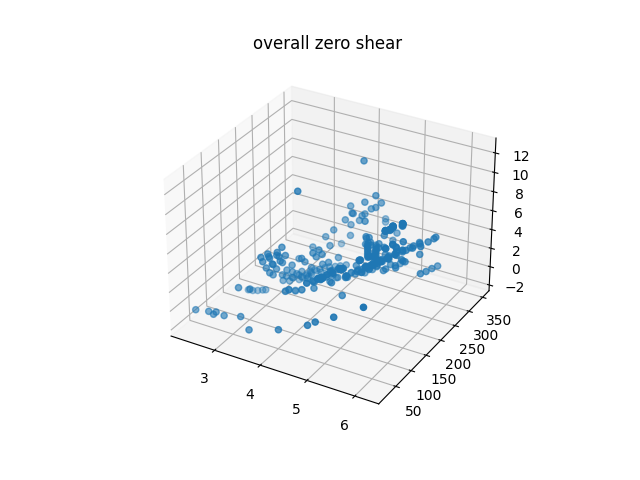

In [37]:
ax = plt.axes(projection='3d')
ax.set_title('overall zero shear')
ax.scatter3D(np.log10(x_overall), T_overall ,np.log10(y_overall))
plt.show